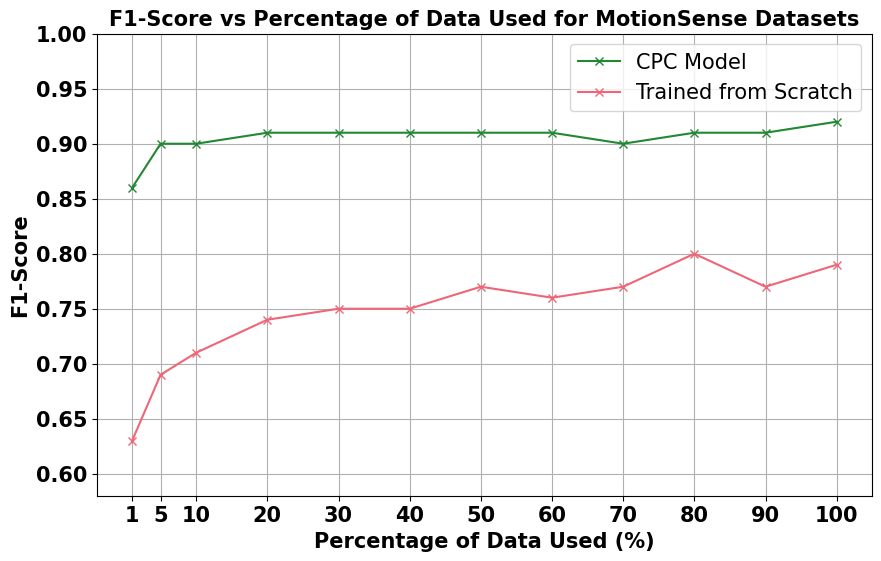

In [3]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np

# Definindo as porcentagens de dados
percentages = [1, 5, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]

# Dicionário para armazenar as F1-scores para o seu modelo e para o modelo CPC
f1_scores_your_model = {}
f1_scores_cpc_model = {}

# Caminho para a pasta onde os arquivos CSV estão armazenados
csv_path = './'

# Lendo os arquivos CSV e extraindo as F1-scores para o seu modelo
for percentage in percentages:
    filename = f"best_metrics_MotionSense_SemModel_{percentage}%.csv"
    filepath = os.path.join(csv_path, filename)
    
    if os.path.exists(filepath):
        df = pd.read_csv(filepath)
        f1_score = df.loc[df['metric'] == 'f1_score', 'value'].values[0]
        f1_scores_your_model[percentage] = round(float(f1_score), 2)
    else:
        print(f"File {filename} not found")

# Lendo os arquivos CSV e extraindo as F1-scores para o modelo CPC
for percentage in percentages:
    filename = f"best_metrics_MotionSense_ComCPC_{percentage}%.csv"
    filepath = os.path.join(csv_path, filename)
    
    if os.path.exists(filepath):
        df = pd.read_csv(filepath)
        f1_score = df.loc[df['metric'] == 'f1_score', 'value'].values[0]
        f1_scores_cpc_model[percentage] = round(float(f1_score), 2)
    else:
        print(f"File {filename} not found")
min_f1_score = min(min(f1_scores_your_model.values()), min(f1_scores_cpc_model.values()))

# Plotando os dados
plt.figure(figsize=(10, 6))
plt.plot(list(f1_scores_cpc_model.keys()), list(f1_scores_cpc_model.values()), marker='x', linestyle='-', color='#228833', label='CPC Model')
plt.plot(list(f1_scores_your_model.keys()), list(f1_scores_your_model.values()), marker='x', linestyle='-', color='#EE6677', label='Trained from Scratch')
plt.xlabel('Percentage of Data Used (%)', fontsize=15, fontweight='bold')
plt.ylabel('F1-Score', fontsize=15, fontweight='bold')
plt.title('F1-Score vs Percentage of Data Used for MotionSense Datasets', fontsize=15, fontweight='bold')
plt.grid(True)
plt.xticks(percentages, fontsize=15, fontweight='bold')  # Marcadores no eixo X para cada porcentagem
plt.yticks(fontsize=15, fontweight='bold')
plt.legend(fontsize=15)  # Adiciona uma legenda ao gráfico
plt.ylim([min_f1_score - 0.05, 1]) # Define o intervalo do eixo y para [0, 1]
plt.show()

